# Tipologia i cicle de vida de les dades – Pràctica 2: Neteja i anàlisi de les dades
### Andrés Pardo Ginés
### 07.01.2020

## 1. Descripció del dataset. Perquè és important i quina pregunta/problema pretén respondre?

Aquest *dataset* conté dades referents a la venta de jocs a la plataforma de joc online per ordinadors anomenada Steam. Les ha compilat l'usuari Nik Davis de kaggle.com i posat a la disposició de tothom a la url següent: https://www.kaggle.com/nikdavis/steam-store-games

Per obtenir més detalls sobre el procés d'obtenció i neteja de les dades originals hem fet servir com a referència diversos missatges que el creador va pujar al seu blog personal. L'enllaç als mateixos és aquí: https://nik-davis.github.io/tag/steam.html

Així les dades que hem tractat són les provinents del fitxer "steam.csv".

Al primer missatge del seu blog sobre el set de dades: https://nik-davis.github.io/posts/2019/steam-data-collection/ Aquí l'autor ens parla del procés d'adquisició de dades que té dues fonts: la primera la API de la pròpia plataforma Steam que ens donarà informació sobre els jocs referents als gèneres que pertany, la seva compatibilitat, preu, etc i la segona provinent de la pàgina web steamspy.com que aportarà les dades sobre ventes i popularitat extrapolades fent servir la mateix API oficial a la que hem fet referència. Degut a la popularitat d'steamspy els creadors d'Steam van restringir part de la informació provinent dels perfils dels usuaris de la plataforma que l'autor d'steamspy feia servir per a extrapolar-ne les dades de popularitat de forma prou detallada. La situació original era que tot perfil d'usuari era per defecte públic, això comportava un clar problema de protecció de dades i es va canviar, cosa que va fer mínbar sobtadament el nombre de perfils públics disponibles als usuaris que han fet explicit que el seu perfil sigui públic. Això ha fet que les dades d´*ownership* a la que ens permet accedir la plataforma hagin passat a ser aproximacions entre dues xifres, de 0 a 20.000, per exemple. Per tant, el creador del dataset ha combinat les dades provinents de la API mateixa d'Steam amb les que actualment prové steamspy sobre popularitat per a crear el dataset del que *estem* parlant. Com veurem més endavant el procés de neteja de dades que hem realitzat per a poder donar resposta  la nostra pregunta no ha estat pas fàcil. 

Personalment nosaltres ens preguntàvem si el fet d'incloure un mode multigador a un joc AA o AAA modifica positivament les seves ventes o recepció popular. Un joc AAA és l'equivalent a un blockbuster a Hollywood, wikipedia: https://en.wikipedia.org/wiki/AAA_(video_game_industry) . Anàlogament i de forma també informal un joc AA és un joc també amb intenció de ser *mainstream*, però d'un pressupost més limitat. Molts videojocs europeus o japonesos desenvolupats per estudis de mida mitjana entren en aquesta categoria. Volem per tant centrar-nos en si el fet de tenir multigador modifica la recepció o las ventes de jocs AA o AAA *premium* i no *free to play*.

## 2. Integració i selecció de les dades d’interès a analitzar.

Primer llegirem el fitxer original steam.csv. Veurem que hi ha 27075 registres inicialment.

In [868]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
steam = pd.read_csv("csv/steam.csv")

In [869]:
steam.describe(include="all")

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
count,2.707500e+04,27075,27075,27075.000000,27075,27075,27075,27075.000000,27075,27075,27075,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075,27075.000000
unique,NaN,27033,2619,NaN,17113,14354,7,NaN,3333,1552,6423,NaN,NaN,NaN,NaN,NaN,13,NaN
top,NaN,Dark Matter,2018-07-13,NaN,Choice of Games,Big Fish Games,windows,NaN,Single-player,Action;Indie,Action;Indie;Casual,NaN,NaN,NaN,NaN,NaN,0-20000,NaN
freq,NaN,3,64,NaN,94,212,18398,NaN,6110,1852,845,NaN,NaN,NaN,NaN,NaN,18596,NaN
mean,5.962035e+05,NaN,NaN,0.981127,NaN,NaN,NaN,0.354903,NaN,NaN,NaN,45.248864,1.000559e+03,211.027147,149.804949,146.05603,NaN,6.078193
std,2.508942e+05,NaN,NaN,0.136081,NaN,NaN,NaN,2.406044,NaN,NaN,NaN,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,NaN,7.874922
min,1.000000e+01,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.00000,NaN,0.000000
25%,4.012300e+05,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,6.000000e+00,2.000000,0.000000,0.00000,NaN,1.690000
50%,5.990700e+05,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,7.000000,2.400000e+01,9.000000,0.000000,0.00000,NaN,3.990000
75%,7.987600e+05,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,23.000000,1.260000e+02,42.000000,0.000000,0.00000,NaN,7.190000


## 3. Neteja de les dades.
### 3.1. Les dades contenen zeros o elements buits? Com gestionaries aquests casos?

Gràcies al procés de neteja original el fitxer no inclou cap registre buit o nul. 

In [870]:
steam.isna().any()

appid               False
name                False
release_date        False
english             False
developer           False
publisher           False
platforms           False
required_age        False
categories          False
genres              False
steamspy_tags       False
achievements        False
positive_ratings    False
negative_ratings    False
average_playtime    False
median_playtime     False
owners              False
price               False
dtype: bool

In [871]:
steam.isnull().any()

appid               False
name                False
release_date        False
english             False
developer           False
publisher           False
platforms           False
required_age        False
categories          False
genres              False
steamspy_tags       False
achievements        False
positive_ratings    False
negative_ratings    False
average_playtime    False
median_playtime     False
owners              False
price               False
dtype: bool

Com hem explicat anteriorment el nostre objectiu és analitzar l'estat del mercat de jocs AA i AAA a la plataforma. Com els preus s'han registrat en lliures esterlines filtrarem tots els jocs que costin més de 24 d'elles per a definir el que nosaltres hem volgut considerar un joc AA o AAA. A la plataforma es llancen ports de jocs AA o AAA provinent d'altres plataformes d'entreteniment a preu reduït constantment. El nostre coneixement del mercat ens permet pensar que aquests llançaments costen entre 15 i 20 lliures al mercat britànic, degut a la reducció al preu i l'antiguitat dels mateixos hem considerat que aquests jocs no representen el mercat *premium* a Steam que es el que volem tractar en aquesta pràctica i que en canvi si filtréssim fent servir 15 lliures en lloc de 24 estaríem incloent massa jocs independents i de baix pressuposts cosa que no ens permetria fer un anàlisis correcte del mercat AA-AAA a la plataforma. Un cop feta aquesta clarificació passarem a filtrar tots els jocs que costin menys de 24 lliures. Aquests són 643 en un primer moment.

In [872]:
steam_AAA = steam[steam.price> 24]

In [873]:
steam_AAA.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,6.430000e+02,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,5.204408e+05,0.975117,2.071540,37.870918,6675.371695,2538.830482,1044.206843,997.006221,37.189285
std,2.178980e+05,0.155891,5.594655,58.750917,28910.387049,20710.640951,3858.885671,4671.773219,25.611503
min,2.870000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.500000
25%,3.525800e+05,1.000000,0.000000,0.000000,82.000000,24.000000,0.000000,0.000000,27.790000
50%,5.152200e+05,1.000000,0.000000,35.000000,481.000000,145.000000,0.000000,0.000000,30.990000
75%,6.596350e+05,1.000000,0.000000,50.000000,3055.500000,975.000000,806.500000,722.500000,39.990000
max,1.031440e+06,1.000000,18.000000,1165.000000,496184.000000,487076.000000,55204.000000,86148.000000,421.990000


### 3.2. Identificació i tractament de valors extrems.

Per a tractar-ne els valors extrems el que primer farem serà visualitzar les dades fent servir uns quants *boxplots*. Les columnes que estem analitzant seran price, positive ratings i negative ratings. Els boxplots ens mostrem que totes tres contenen valors extrems o *outliers*.

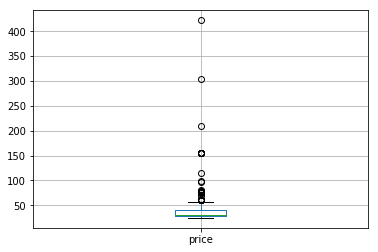

In [874]:
boxplot_price = steam_AAA.boxplot(column=['price'])
boxplot_price

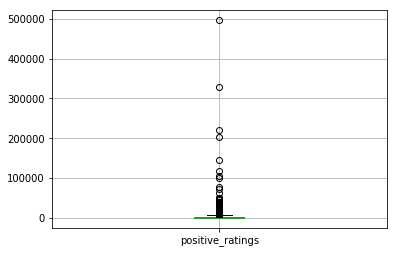

In [875]:
boxplot_pr = steam_AAA.boxplot(column=['positive_ratings'])
boxplot_pr

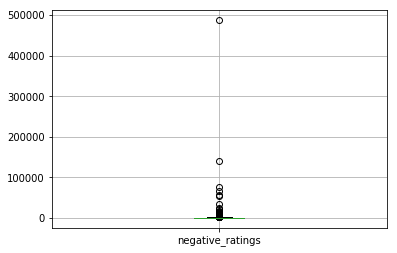

In [876]:
boxplot_nr = steam_AAA.boxplot(column=['negative_ratings'])
boxplot_nr

Primer tractarem els del camp price. Calcularem llavors el zscore de cadascuna dels 643 jocs. Normalment els valors superiors a tres indicant que el valor està separat de la mitjana de la població en més de tres desviacions estàndards. En trobem 11 d'aquests i els volem analitzar a continuació.

In [877]:
from scipy import stats
import numpy as np
z_price = np.abs(stats.zscore(steam_AAA["price"]))
print(z_price[0:5])

[0.47669134 0.43761599 0.43761599 0.04803473 0.08593782]


In [878]:
threshold = 3
list_of_price_outliers = np.where(z_price > threshold)
print(list_of_price_outliers)

(array([257, 313, 322, 333, 410, 411, 412, 474, 505, 577, 633], dtype=int64),)


In [879]:
index_price_outliers = []
for element in list_of_price_outliers[0]:
    index_price_outliers.append(element)

A la taula a continuació podem veure diverses coses. La majoria d'entrades amb aquests preus tan superiors són software relacionat amb el desenvolupament de videojocs i no videojocs en si mateixos. No ens interessa el software de desenvolupament per tant caldrà eliminar aquests entrades, però abans de fer-ho realitzarem el mateix procés a les altres dues variables que estem tractant: positive ratings i negative ratings.

In [880]:
steam_AAA.iloc[index_price_outliers, :]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
7992,438450,3DF Zephyr Lite Steam Edition,2016-02-02,1,3Dflow SRL,3Dflow SRL,windows,0,Steam Trading Cards,Animation & Modeling;Design & Illustration;Video Production,Video Production;Design & Illustration;Animation & Modeling,0,30,2,0,0,0-20000,154.99
10034,502570,Houdini Indie,2018-10-10,1,SideFX,SideFX,windows,0,Partial Controller Support;Steam Cloud,Animation & Modeling;Design & Illustration;Game Development,Animation & Modeling;Game Development;3D,0,23,0,0,0,0-20000,209.99
10624,517500,Tactics: Bludgeons Blessing,2017-07-04,1,Capt. McCay Soft,Capt. McCay Soft,windows;mac,0,Single-player;Steam Trading Cards,Action;Simulation;Strategy,Strategy;Action;Simulation,0,0,4,0,0,0-20000,154.99
10910,526310,Silhouette,2016-11-13,1,Apeirogon Games,Apeirogon Games,windows,0,Single-player;Partial Controller Support,Adventure;Indie;Early Access,Early Access;Adventure;Indie,0,13,4,0,0,0-20000,154.99
13061,585600,GameMaker Studio 2 Web,2017-03-08,1,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,In-App Purchases,Animation & Modeling;Design & Illustration;Education;Utilities;Web Publishing;Game Development,Game Development;Design & Illustration;Utilities,0,4,3,1889,1889,0-20000,114.99
13062,585610,GameMaker Studio 2 UWP,2017-03-08,1,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,In-App Purchases,Animation & Modeling;Design & Illustration;Education;Software Training;Utilities;Web Publishing;Game Development,Game Development;Design & Illustration;Utilities,0,1,0,0,0,0-20000,303.99
13063,585620,GameMaker Studio 2 Mobile,2017-03-08,1,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,In-App Purchases,Animation & Modeling;Design & Illustration;Education;Software Training;Utilities;Web Publishing;Game Development,Game Development;Design & Illustration;Utilities,0,13,7,0,0,0-20000,154.99
14917,648070,CrisisActionVR,2017-09-11,1,Pixel Wonder,Pixel Wonder,windows,0,Single-player;Multi-player;Online Multi-Player;Online Co-op;Steam Achievements,Violent;Gore;Action;Adventure;Indie;Massively Multiplayer,Massively Multiplayer;Indie;Action,20,14,10,0,0,0-20000,154.99
17126,707770,Tactics 2: War,2017-09-22,1,Capt McCay Soft,Capt McCay Soft,windows;mac,0,Single-player,Action;Simulation;Strategy,Strategy;Action;Simulation,0,3,6,0,0,0-20000,154.99
21105,821800,ADR-Labelling Game,2018-04-12,1,Suomen Kuljetusturva Oy,Suomen Kuljetusturva Oy,windows,0,Single-player,Simulation,Simulation;Difficult,0,1,0,0,0,0-20000,421.99


Per a aquestes dues variables veurem que els *outliers* són en efecte alguns dels jocs més populars de la plataforma per tant decidim no modificar aquestes entrades ja que si representen el mercat *premium* del que estem parlant.

In [881]:
z_pr = np.abs(stats.zscore(steam_AAA["positive_ratings"]))
list_of_pr_outliers = np.where(z_pr > 3)
print(list_of_pr_outliers)

(array([ 17,  32,  57,  76,  95, 153, 192, 397], dtype=int64),)


In [882]:
index_pr_outliers = []
for element in list_of_pr_outliers[0]:
    index_pr_outliers.append(element)

In [883]:
steam_AAA.iloc[index_pr_outliers, :]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1127,107410,Arma 3,2013-09-12,1,Bohemia Interactive,Bohemia Interactive,windows,0,Single-player;Multi-player;Online Multi-Player;Local Multi-Player;Co-op;Online Co-op;Local Co-op;Steam Achievements;Steam Trading Cards;Captions available;Steam Workshop;Partial Controller Support;Steam Leaderboards;Includes level editor,Action;Simulation;Strategy,Simulation;Military;Multiplayer,104,105034,12524,18823,3621,2000000-5000000,29.99
1506,221100,DayZ,2018-12-13,1,Bohemia Interactive,Bohemia Interactive,windows,18,Multi-player;Online Multi-Player;Steam Workshop;Steam Cloud;Valve Anti-Cheat enabled,Action;Adventure;Massively Multiplayer,Survival;Zombies;Open World,0,118435,77169,7235,2798,2000000-5000000,33.99
2016,252490,Rust,2018-02-08,1,Facepunch Studios,Facepunch Studios,windows;mac,18,Multi-player;Online Multi-Player;MMO;Co-op;Online Co-op;Cross-Platform Multiplayer;Steam Achievements;Steam Trading Cards;Steam Workshop;In-App Purchases;Valve Anti-Cheat enabled;Stats,Action;Adventure;Indie;Massively Multiplayer;RPG,Survival;Crafting;Multiplayer,48,220370,53709,9352,2234,5000000-10000000,27.79
2478,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;Full controller support,Action;Adventure,Open World;Action;Multiplayer,77,329061,139308,9837,4834,10000000-20000000,24.99
2964,292030,The Witcher® 3: Wild Hunt,2015-05-18,1,CD PROJEKT RED,CD PROJEKT RED,windows,0,Single-player;Steam Achievements;Full controller support;Steam Trading Cards;Steam Cloud,RPG,Open World;RPG;Story Rich,78,202930,4798,3068,2002,5000000-10000000,24.99
4712,346110,ARK: Survival Evolved,2017-08-27,1,Studio Wildcard;Instinct Games;Efecto Studios;Virtual Basement LLC,Studio Wildcard,windows;mac;linux,0,Single-player;Multi-player;MMO;Co-op;Steam Achievements;Full controller support;VR Support;Steam Workshop;Steam Cloud;Valve Anti-Cheat enabled;Includes level editor,Action;Adventure;Indie;Massively Multiplayer;RPG,Survival;Open World;Multiplayer,32,145035,66603,14154,1470,5000000-10000000,44.99
5817,374320,DARK SOULS™ III,2016-04-11,1,"FromSoftware, Inc.","FromSoftware, Inc.;BANDAI NAMCO Entertainment",windows,0,Single-player;Multi-player;Co-op;Steam Achievements;Full controller support;Steam Trading Cards,Action,Dark Fantasy;Difficult;RPG,43,100412,9953,4222,1776,2000000-5000000,39.99
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99


In [884]:
z_nr = np.abs(stats.zscore(steam_AAA["negative_ratings"]))
list_of_nr_outliers = np.where(z_nr > 3)
print(list_of_nr_outliers)

(array([ 32,  76, 153, 397], dtype=int64),)


In [885]:
index_nr_outliers = []
for element in list_of_nr_outliers[0]:
    index_nr_outliers.append(element)

In [886]:
steam_AAA.iloc[index_nr_outliers, :]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1506,221100,DayZ,2018-12-13,1,Bohemia Interactive,Bohemia Interactive,windows,18,Multi-player;Online Multi-Player;Steam Workshop;Steam Cloud;Valve Anti-Cheat enabled,Action;Adventure;Massively Multiplayer,Survival;Zombies;Open World,0,118435,77169,7235,2798,2000000-5000000,33.99
2478,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;Full controller support,Action;Adventure,Open World;Action;Multiplayer,77,329061,139308,9837,4834,10000000-20000000,24.99
4712,346110,ARK: Survival Evolved,2017-08-27,1,Studio Wildcard;Instinct Games;Efecto Studios;Virtual Basement LLC,Studio Wildcard,windows;mac;linux,0,Single-player;Multi-player;MMO;Co-op;Steam Achievements;Full controller support;VR Support;Steam Workshop;Steam Cloud;Valve Anti-Cheat enabled;Includes level editor,Action;Adventure;Indie;Massively Multiplayer;RPG,Survival;Open World;Multiplayer,32,145035,66603,14154,1470,5000000-10000000,44.99
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99


La resta de valors extrems que hem trobat a price pertanyen a jocs que semblem ser intents d'estafar a usuaris desprevinguts per tant els esborrarem amb la resta i mirarem com queda el *boxplot*. Encara queden algunes entrades amb preus prou diferents de la resta que tractarem més endavant.

In [887]:
steam_AAA_no = steam_AAA.drop(steam_AAA.index[index_price_outliers])

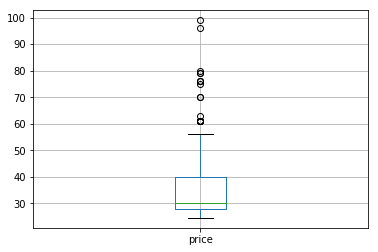

In [888]:
boxplot_price_no = steam_AAA_no.boxplot(column=['price'])
boxplot_price_no

Ara comprovarem quins jocs tenen ratings negatius i positius iguals a 0. Dels jocs que no tenen cap valoració positiva podem veure que un dels dos és software per a produir àudio i que costa a més a més 98.99 lliures. Per tant l'eliminarem més endavant. 

In [889]:
steam_AAA_no.loc[steam_AAA_no['positive_ratings'] == 0]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
7696,431030,The Music Room,2017-08-17,1,Chroma Coda,Chroma Coda,windows,0,VR Support,Audio Production,Audio Production,0,0,1,0,0,0-20000,98.99
22313,859920,Double Head Shark Attack,2018-10-18,1,BigCode Games Pvt Ltd,BigCode Games Pvt Ltd,windows,0,Single-player;Online Multi-Player,Casual;Massively Multiplayer;Simulation,Massively Multiplayer;Casual;Simulation,10,0,1,0,0,0-20000,32.99


Els jocs amb 0 valoracions negativa podem veure que la majoria són aventures gràfiques pornogràfiques o simuladors de tota mena. Hem decidit no tocar les entrades que pertanyin al gènere de la simulació i decidir-ho més endavant per les de contingut sexual, en canvi la peça de software que hem trobat si hem decidit que serà eliminada. Abans d'eliminar ambdós programes el que farem es comprovar si el mateix desenvolupador encara té altres entrades al nostre grup objectiu. Veurem que no és així i per tant més endavant eliminarem les dues entrades.

In [890]:
steam_AAA_no.loc[steam_AAA_no['negative_ratings'] == 0]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
4374,338070,ルナティックドーン レジェンドパック,2015-01-08,0,ARTDINK,Degica,windows,0,Single-player,RPG,RPG,0,10,0,0,0,0-20000,26.99
4377,338100,栄冠は君に レジェンドパック,2015-01-08,0,ARTDINK,Degica,windows,0,Single-player,Simulation,Simulation,0,3,0,0,0,0-20000,26.99
6825,403030,mdiapp+ SE,2017-10-16,1,nattou.org,PGN Inc,windows,0,Steam Trading Cards,Design & Illustration,Design & Illustration,0,4,0,0,0,0-20000,45.00
18269,741390,最強の囲碁 ～名人への道～ / Igo Meijin,2017-12-04,0,UNBALANCE Corporation,UNBALANCE Corporation,windows,0,Single-player;Multi-player,Casual;Strategy,Casual;Strategy,0,1,0,0,0,0-20000,62.99
18745,755320,"CyberLink PowerDVD 18 Ultra - Media player, video player, 4k media player, 360 video",2018-06-12,1,CyberLink,Koch Media,windows,0,Partial Controller Support,Animation & Modeling;Utilities,Utilities;Animation & Modeling,0,1,0,0,0,0-20000,79.99
19260,769680,愛神餐館2,2017-12-29,0,Firedog Creative Company Limited,Firedog Creative Company Limited,windows,0,Single-player,RPG;Simulation,RPG;Simulation;Anime,0,19,0,0,0,0-20000,27.79
24339,928690,覇県を握れ ～47都道府県大戦～,2018-11-22,0,Flying Panjandrum / ふらいんぐパンジャンドラム,Flying Panjandrum / ふらいんぐパンジャンドラム,windows,0,Single-player,Indie;Simulation;Strategy,Strategy;Indie;Simulation,0,4,0,0,0,0-20000,30.99
25081,956240,Simson Tuningwerkstatt 3D,2018-12-03,0,Silvio Mölter;Marcel Mölter,Thinking-Twins GbR,windows;mac,0,Single-player;Steam Achievements;Steam Cloud,Simulation,Simulation,14,2,0,0,0,0-20000,24.99
25664,980830,Death Mark,2019-04-04,1,Experience,Aksys Games,windows,18,Single-player;Steam Achievements;Partial Controller Support;Steam Cloud,Adventure,Adventure;Violent;Sexual Content,31,22,0,0,0,0-20000,32.99
26325,1013180,Funbag Fantasy,2019-01-31,1,Waffle,MangaGamer,windows,18,Single-player;Steam Cloud,Adventure,Sexual Content;Nudity;Adventure,0,21,0,0,0,0-20000,31.99


In [891]:
steam_AAA_no.loc[steam_AAA_no['developer'] == "Chroma Coda"]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
7696,431030,The Music Room,2017-08-17,1,Chroma Coda,Chroma Coda,windows,0,VR Support,Audio Production,Audio Production,0,0,1,0,0,0-20000,98.99


In [892]:
steam_AAA_no.loc[steam_AAA_no['developer'] == "CyberLink"]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
18745,755320,"CyberLink PowerDVD 18 Ultra - Media player, video player, 4k media player, 360 video",2018-06-12,1,CyberLink,Koch Media,windows,0,Partial Controller Support,Animation & Modeling;Utilities,Utilities;Animation & Modeling,0,1,0,0,0,0-20000,79.99


El que farem ara serà escriure una funció que extregui les etiquetes individuals per a la columna objectiu i ens retorni els objectes que continguin l'etiqueta objectiu. Mitjançant aquest codi hem cercat a la columna steamspy_tags per a entrades amb l'etiqueta "audio". Obtenim dos resultats, un de nou i un de conegut. 

In [893]:
def tag_checker(dataframe, column_name, tag):
    output_list = []
    index_list = []
    for index, item in dataframe[column_name].iteritems():
        tag_status = 0
        item_split = item.split(";")
        for element in item_split:
            if element == tag:
                tag_status = 1
#                 print(element, "True")
        output_list.append(tag_status)
        index_list.append(index)
    output_Series = pd.Series(output_list, index = index_list)    
    return output_Series

In [894]:
audio = tag_checker(steam_AAA_no, "steamspy_tags", "Audio Production")
steam_AAA_no["audio"] = audio
pd.set_option('display.max_colwidth', -1)
steam_AAA_no[steam_AAA_no["audio"] == 1]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,audio
2419,269470,MorphVOX Pro - Voice Changer,2014-02-13,1,Screaming Bee,Screaming Bee,windows,0,Single-player;Steam Cloud,Audio Production;Utilities,Audio Production;Utilities;Software,0,184,147,0,0,0-20000,29.99,1
7696,431030,The Music Room,2017-08-17,1,Chroma Coda,Chroma Coda,windows,0,VR Support,Audio Production,Audio Production,0,0,1,0,0,0-20000,98.99,1


Fent el mateix per l'etiqueta "utilities" trobem 11 entrades. Eliminarem les 13 entrades descobertes. 

In [895]:
utilities = tag_checker(steam_AAA_no, "steamspy_tags", "Utilities")
steam_AAA_no["utilities"] = utilities
pd.set_option('display.max_colwidth', -1)
steam_AAA_no[steam_AAA_no["utilities"] == 1]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,audio,utilities
1854,244830,Wing IDE 5,2014-04-30,1,Wingware,Wingware,windows;mac;linux,0,Single-player,Utilities,Utilities;Programming,0,16,2,0,0,0-20000,60.99,0,1
2419,269470,MorphVOX Pro - Voice Changer,2014-02-13,1,Screaming Bee,Screaming Bee,windows,0,Single-player;Steam Cloud,Audio Production;Utilities,Audio Production;Utilities;Software,0,184,147,0,0,0-20000,29.99,1,1
3950,325180,AppGameKit: Easy Game Development,2014-11-21,1,The Game Creators,The Game Creators,windows;mac;linux,0,Steam Workshop,Animation & Modeling;Design & Illustration;Education;Software Training;Utilities;Web Publishing,Game Development;Software Training;Utilities,0,225,27,1,1,50000-100000,60.99,0,1
4165,332360,Spriter Pro,2014-11-14,1,BrashMonkey,BrashMonkey,windows;mac;linux,0,Steam Trading Cards,Animation & Modeling;Design & Illustration;Utilities,Animation & Modeling;Design & Illustration;Utilities,0,208,55,0,0,100000-200000,44.99,0,1
4770,347400,001 Game Creator,2015-07-13,1,SoftWeir Inc.,SoftWeir Inc.,windows,0,Steam Achievements;Partial Controller Support;Stats;Includes level editor,Animation & Modeling;Design & Illustration;Education;Software Training;Utilities;Video Production;Web Publishing;Game Development,Game Development;Design & Illustration;Utilities,11,105,24,0,0,0-20000,46.49,0,1
5622,369190,Shoot 'Em Up Kit,2015-06-05,1,Tall Studios,Tall Studios,windows,0,Partial Controller Support;Includes level editor,Animation & Modeling;Design & Illustration;Education;Utilities;Early Access,Early Access;Utilities;Animation & Modeling,0,19,10,0,0,0-20000,29.99,0,1
12517,570090,articy:draft 3,2017-02-16,1,ByteRockers' Games,articy Software,windows,0,Single-player;Steam Trading Cards;Steam Cloud,Design & Illustration;Education;Utilities,Design & Illustration;Utilities;Education,0,25,6,0,0,0-20000,74.99,0,1
13053,585410,GameMaker Studio 2 Desktop,2017-03-08,1,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,In-App Purchases,Animation & Modeling;Design & Illustration;Education;Software Training;Utilities;Web Publishing;Game Development,Game Development;Utilities;Animation & Modeling,0,331,104,0,0,20000-50000,75.99,0,1
17133,708120,Printer Forge 3D,2017-10-16,1,PF3D,PF3D,windows,0,Includes level editor,Animation & Modeling;Design & Illustration;Utilities;Early Access,Early Access;Design & Illustration;Utilities,0,6,5,0,0,0-20000,32.99,0,1
18745,755320,"CyberLink PowerDVD 18 Ultra - Media player, video player, 4k media player, 360 video",2018-06-12,1,CyberLink,Koch Media,windows,0,Partial Controller Support,Animation & Modeling;Utilities,Utilities;Animation & Modeling,0,1,0,0,0,0-20000,79.99,0,1


In [896]:
print(len(steam_AAA_no))
steam_AAA_no = steam_AAA_no[steam_AAA_no['utilities'] != 1]
steam_AAA_no = steam_AAA_no[steam_AAA_no['developer'] != "Chroma Coda"]
steam_AAA_no.drop(["audio", "utilities"], axis=1, inplace=True)
print(len(steam_AAA_no))

632
619


Analitzant les entrades amb el *tag* "Sexual-content" veurem que la majoria es tracta de jocs AA o AAA d'editors japonesos com poden ser Koei Tecmo o Marvelous, per tant no les eliminaren ja que si pertanyen al mercat objectiu.

In [897]:
sexual_content = tag_checker(steam_AAA_no, "steamspy_tags", "Sexual Content")
steam_AAA_no["Sexual-content"] = sexual_content
pd.set_option('display.max_colwidth', -1)
steam_AAA_no[steam_AAA_no["Sexual-content"] == 1]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Sexual-content
8131,444140,Sonicomi,2016-07-01,1,Nitroplus,JAST USA,windows,0,Single-player;Steam Achievements;Steam Trading Cards;Captions available;Partial Controller Support;Steam Cloud,Adventure;Casual,Sexual Content;Anime;Mature,44,390,37,0,0,20000-50000,26.99,1
10045,502800,SENRAN KAGURA ESTIVAL VERSUS,2017-03-17,1,Tamsoft,"XSEED Games;Marvelous USA, Inc.;Marvelous",windows,0,Single-player;Multi-player;Steam Achievements;Steam Trading Cards;Partial Controller Support;Steam Cloud,Action,Nudity;Sexual Content;Anime,50,2837,127,1993,1993,50000-100000,24.99,1
10374,511740,Gal*Gun: Double Peace,2016-09-27,1,"INTI CREATES CO., LTD.",PQube Limited,windows,0,Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud,Action;Adventure,Sexual Content;Anime;Nudity,39,1269,202,141,232,50000-100000,29.99,1
11853,552280,游魂2-you're the only one- / Tayutama 2-you're the only one-,2016-12-09,0,Lump of Sugar;HIKARI FIELD,HIKARI FIELD,windows,0,Single-player;Steam Trading Cards,Adventure,Anime;Sexual Content;Dating Sim,0,1380,29,0,0,20000-50000,27.79,1
12122,558870,Club Naughty,2016-11-18,1,Ripknot Systems,Ripknot Systems,windows,18,Single-player;Steam Achievements,Sexual Content;Nudity;Action;Casual;Indie;RPG;Simulation;Strategy,Sexual Content;Nudity;Simulation,185,40,61,0,0,0-20000,24.99,1
13734,604170,Libra of the Vampire Princess,2017-06-20,1,onomatope*;MiKandi Japan,onomatope*;MiKandi Japan,windows,18,Single-player;Steam Achievements;Steam Trading Cards,Sexual Content;Nudity;Adventure;Casual;Simulation,Sexual Content;Visual Novel;Nudity,15,31,5,276,276,0-20000,29.99,1
14561,632710,Princess Evangile W Happiness - Steam Edition,2017-07-28,1,MOONSTONE,MangaGamer,windows,0,Single-player;Steam Trading Cards;Steam Cloud,Sexual Content;Adventure;Casual,Sexual Content;Adventure;Casual,0,28,2,0,0,0-20000,26.99,1
14562,632800,Beyond Eden,2017-10-06,1,Studio Pieplus,Studio Pieplus,windows;mac,0,Single-player;Steam Achievements;Steam Trading Cards,Sexual Content;Nudity;Adventure;Indie,Sexual Content;Visual Novel;Nudity,18,61,8,0,0,0-20000,27.79,1
14653,636570,Nights of Azure 2: Bride of the New Moon / よるのないくに２ ～新月の花嫁～,2017-10-24,1,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",windows,0,Single-player;Steam Achievements;Partial Controller Support,RPG,RPG;Sexual Content;Anime,52,170,49,0,0,0-20000,49.99,1
15285,658140,Sakura Sakura,2018-11-19,1,Hiqosoft,Sol Press,windows,0,Single-player;Steam Achievements,Casual;Indie,Sexual Content;Nudity;Visual Novel,17,12,1,0,0,0-20000,27.79,1


El següent pas serà corregir els rangs d'"owners" que proveïts per steamspy i per a fer-ho hem escrit una funció owner_parser que agafa els valors dels rangs els suma i divideix entre dos. Cridarem aquesta funció per a incloure els valors corregits a un nou camp que hem anomenat corrected_owners.

In [898]:
def owner_parser(dataframe, column_name):
    output_list = []
    index_list = []
    for index, item in dataframe[column_name].iteritems():
        item_split = item.split("-")
        middle = (int(item_split[0]) + int(item_split[1]))/2
        output_list.append(middle)
        index_list.append(index)
    output_Series = pd.Series(output_list, index = index_list)    
    return output_Series

In [899]:
corrected_owners = owner_parser(steam_AAA_no, "owners")
steam_AAA_no["corrected_owners"] = corrected_owners
pd.set_option('display.max_colwidth', -1)
steam_AAA_no[["owners", "corrected_owners"]][0:10]

,owners,corrected_owners
77,200000-500000,350000.0
123,200000-500000,350000.0
184,100000-200000,150000.0
455,1000000-2000000,1500000.0
501,1000000-2000000,1500000.0
780,2000000-5000000,3500000.0
801,2000000-5000000,3500000.0
864,20000-50000,35000.0
865,20000-50000,35000.0
870,20000-50000,35000.0


Ara hem creat una altra funció aquest té l'objectiu de crear una nova variable total_ratings que s'encarregarà de combinar els ratings positius i negatius a una sola columna i que a més a més filtrarà tots aquells que en conjunt tinguin menys de 50 valoracions, ja que no sembla lògic que cap joc que no s'hagi acabat de llançar i fos un joc *premium* no contés amb almenys 50 valoracions en total. Si hem escollit 50 com a *threshold* es perquè experimentalment vam veure que els usuaris de parla no anglesa tendeixen a deixar menys comentaris públics i això fa que jocs japonesos, xinesos, etc tinguin menys valoracions per compra dels ratings habituals. Si el joc s'acaba de llençar tampoc aportarà prou informació si només menys de 50 valoracions, per tot això hem escollit aquesta xifra.

In [900]:
def total_rating(dataframe):    
    output_list = []
    index_list = []
    for index, item, item2 in dataframe.itertuples():
        positive = item
        negative = item2
        total = positive + negative
        if total < 50:
            output_list.append(-1)
        elif positive == 0:
            percentage = 0
            output_list.append(percentage)
        else:
            total = positive + negative
            percentage = (positive/total) * 100 
            output_list.append(percentage)
#         print(positive, negative, total, percentage)
        index_list.append(index)
    output_Series = pd.Series(output_list, index = index_list)  
    return output_list

In [901]:
total_ratings = total_rating(steam_AAA_no[["positive_ratings", "negative_ratings"]])
steam_AAA_no["total_ratings"] = total_ratings
print(len(steam_AAA_no[steam_AAA_no["total_ratings"] == -1]))
check_total = steam_AAA_no[steam_AAA_no["total_ratings"] == -1]
check_total[["name", "positive_ratings", "negative_ratings", "total_ratings"]]
steam_AAA_no = steam_AAA_no[steam_AAA_no["total_ratings"] != -1]
print(len(steam_AAA_no))

83
536


## 4. Anàlisi de les dades.
### 4.1. Selecció dels grups de dades que es volen analitzar/comparar (planificació dels anàlisis a aplicar).

Ara passarem a dividir les dades en els dos grups que volem analitzar: jocs purament d'un jugador o que continguin també mode multi-jugador. Per a fer-ho cridarem de nou al mètode tag_checker descrit anteriorment per l'etiqueta "multiplayer" a la columna categories.

In [902]:
multiplayer = tag_checker(steam_AAA_no, "categories", "Multi-player")
steam_AAA_no["multiplayer"] = multiplayer
pd.set_option('display.max_colwidth', -1)
steam_AAA_no[["categories", "multiplayer"]][0:10]

,categories,multiplayer
77,Single-player;Steam Achievements;Full controller support;Steam Trading Cards;Captions available;Steam Workshop;Steam Cloud,0
123,Single-player;Multi-player,1
184,Single-player;Multi-player;Includes level editor,1
455,Single-player,0
501,Single-player;Steam Achievements;Full controller support;Steam Trading Cards;Steam Workshop;In-App Purchases;Steam Cloud;Steam Leaderboards,0
780,Single-player;Multi-player;Online Multi-Player;Local Multi-Player;Co-op;Online Co-op;Local Co-op;Shared/Split Screen;Cross-Platform Multiplayer;Steam Achievements;Full controller support;Steam Trading Cards;Steam Workshop;Steam Cloud;Steam Leaderboards;Includes level editor,1
801,Single-player;Multi-player;Co-op;Steam Achievements;Partial Controller Support;Valve Anti-Cheat enabled,1
888,Single-player,0
891,Single-player;Multi-player;Co-op,1
999,Single-player;Multi-player;Steam Achievements;Steam Trading Cards;Steam Workshop;Steam Cloud,1


Podem veure que ara mateix tindríem 325 jocs purament *singleplayer* i 211 *multiplayer*.

In [903]:
print(len(steam_AAA_no[steam_AAA_no["multiplayer"] == 0]))
print(len(steam_AAA_no[steam_AAA_no["multiplayer"] == 1]))

325
211


En aquest punt ja tindrem la versió final netejada de les nostres dades, per tant la desarem a la carpeta /csv sota el nom steam_AAA.csv

In [904]:
final_csv_name = "csv/steam_AAA.csv"
steam_AAA_no.to_csv(final_csv_name, index= False)

### 4.2. Comprovació de la normalitat i homogeneïtat de la variància.

Per a comprovar la normalitat farem servir primer probplot sobre el preu. Els resultats ja semblem indicar que no es tracta d'una distribució normal. Passarem a estudiar-ho en profunditat. 

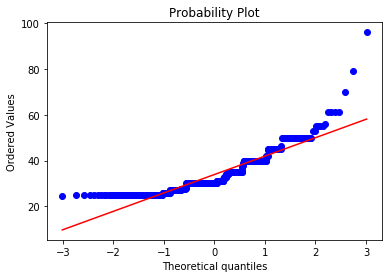

In [905]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(steam_AAA_no["price"], dist="norm", plot=ax)
plt.show()

Crearem ara un pandas dataframe pels jocs purament *singleplayer* i amb *mutiplayer* per a poder treballar més fàcilment amb ambdós grups. 

In [906]:
singleAAA = steam_AAA_no[steam_AAA_no["multiplayer"] == 0]
multiAAA = steam_AAA_no[steam_AAA_no["multiplayer"] == 1]

In [907]:
singleAAA.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,Sexual-content,corrected_owners,total_ratings,multiplayer
count,3.250000e+02,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,3.250000e+02,325.000000,325.0
mean,5.239624e+05,0.990769,2.489231,42.923077,4255.110769,918.618462,819.120000,810.387692,33.973200,0.043077,3.468769e+05,77.039505,0.0
std,2.035070e+05,0.095780,6.051021,68.919775,13404.882846,1874.256597,2883.214623,2847.855045,9.451473,0.203343,8.464041e+05,15.213155,0.0
min,2.870000e+03,0.000000,0.000000,0.000000,20.000000,2.000000,0.000000,0.000000,24.500000,0.000000,1.000000e+04,20.081136,0.0
25%,3.649700e+05,1.000000,0.000000,22.000000,204.000000,45.000000,0.000000,0.000000,26.990000,0.000000,1.000000e+04,70.132198,0.0
50%,5.117400e+05,1.000000,0.000000,42.000000,748.000000,199.000000,78.000000,83.000000,29.990000,0.000000,3.500000e+04,79.574436,0.0
75%,6.485800e+05,1.000000,0.000000,52.000000,2992.000000,962.000000,817.000000,817.000000,39.990000,0.000000,3.500000e+05,88.059701,0.0
max,1.031440e+06,1.000000,18.000000,1165.000000,202930.000000,14719.000000,44169.000000,44169.000000,95.990000,1.000000,7.500000e+06,98.798799,0.0


In [908]:
multiAAA.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,Sexual-content,corrected_owners,total_ratings,multiplayer
count,211.000000,211.0,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,2.110000e+02,211.000000,211.0
mean,461259.099526,1.0,2.137441,44.331754,13776.218009,6317.099526,1909.327014,1778.938389,33.817441,0.009479,1.094431e+06,71.757962,1.0
std,198808.435125,0.0,5.655597,50.876638,46858.131912,35835.966519,5596.255420,7282.897912,7.547786,0.097126,5.355928e+06,14.670933,0.0
min,4230.000000,1.0,0.000000,0.000000,28.000000,4.000000,0.000000,0.000000,24.900000,0.000000,1.000000e+04,26.682692,1.0
25%,311250.000000,1.0,0.000000,11.000000,218.000000,99.000000,0.000000,0.000000,29.990000,0.000000,1.000000e+04,62.713182,1.0
50%,435020.000000,1.0,0.000000,40.000000,1454.000000,498.000000,216.000000,215.000000,30.990000,0.000000,1.500000e+05,73.256452,1.0
75%,590610.000000,1.0,0.000000,51.500000,9226.500000,2476.000000,1645.000000,1544.000000,39.990000,0.000000,7.500000e+05,83.738994,1.0
max,957720.000000,1.0,18.000000,464.000000,496184.000000,487076.000000,55204.000000,86148.000000,69.990000,1.000000,7.500000e+07,95.715250,1.0


Per avaluar la popularitat d'un joc farem servir les columnes corrected_owners i total_ratings que són les que tenen la informació sobre el numero de propietaris d'un joc i la quantitat de valoracions que ha rebut. Fem servir total_ratings enlloc dels estrictament positius perquè hi ha moltes valoracions negatives que es fan com a protesta per la no inclusió d'opcions a un joc, com poden ser idiomes diferents de l'anglès, i ens ha semblat que era millor seguir la dita sobre que es millor que es parli malament d'alguna cosa que no es parli en cap cas, sobretot en el cas d'steam on escriure una valoració és una activitat minoritària comparat amb el nombre de jugadors totals.

Per tant, ara mirarem els probplots per a total_ratings i corrected_owners per les dues categories de jocs que estem estudiant. Encara que algunes d'elles estan a prop de seguir una distribució normal sembla que en cap cas ho fan. 

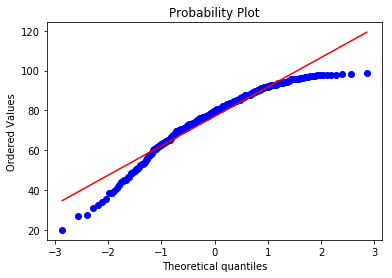

In [909]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(singleAAA["total_ratings"], dist="norm", plot=ax1)
plt.show()

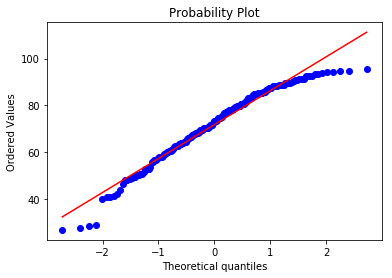

In [910]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(multiAAA["total_ratings"], dist="norm", plot=ax1)
plt.show()

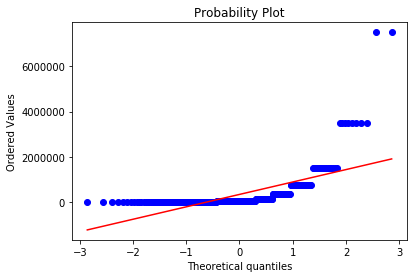

In [911]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(singleAAA["corrected_owners"], dist="norm", plot=ax1)
plt.show()

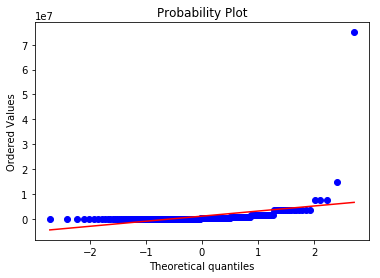

In [912]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
res2 = stats.probplot(multiAAA["corrected_owners"], dist="norm", plot=ax2)
plt.show()

El test de Shapiro ens diu que les dades no segueixen una distribució normal. 

In [913]:
results_single = stats.shapiro(singleAAA["corrected_owners"])
results_multi = stats.shapiro(multiAAA["corrected_owners"])
print(results_single)
print(results_multi)

(0.42010509967803955, 5.41115831731538e-31)
(0.15333151817321777, 9.124281190630661e-30)


In [914]:
results_single_tr = stats.shapiro(singleAAA["total_ratings"])
results_multi_tr = stats.shapiro(multiAAA["total_ratings"])
print(results_single_tr)
print(results_multi_tr)

(0.9300094842910767, 3.189064290420873e-11)
(0.9626942276954651, 2.371328264416661e-05)


"Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed"

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

Com el valor p del test de Levene és alta rebutgem la hipòtesi nul·la i podem dir que les variàncies són homogènies. 

In [915]:
#scipy.stats.fligner only works with same length
equal_variances = stats.levene(singleAAA["corrected_owners"], multiAAA["corrected_owners"])
equal_variances

LeveneResult(statistic=5.905718158637448, pvalue=0.015420237653413273)

In [916]:
equal_variances_tr = stats.levene(singleAAA["total_ratings"], multiAAA["total_ratings"])
equal_variances_tr

LeveneResult(statistic=0.0649867956204793, pvalue=0.7988791132150562)

"If the resulting p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances. Thus, the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population."

https://en.wikipedia.org/wiki/Levene%27s_test

### 4.3. Aplicació de proves estadístiques per comparar els grups de dades. En funció de les dades i de l’objectiu de l’estudi, aplicar proves de contrast d’hipòtesis, correlacions, regressions, etc. Aplicar almenys tres mètodes d’anàlisi diferents.

La primera prova estadística que realitzarem serà la prova U de Mann-Whitney. Aquesta ens dirà si una variable aleatòria és més gran estocàsticament que l'altre. Hem fet servir la versió less per a confirmar la hipòtesi sobre que els jocs sense multijugador són més populars que els que no en tenen, per corrected_owners ha estat així ja que el valor p ha estat menor a l'estàndard 0.05 cosa que confirma que la nostra hipòtesi. En canvi, per a total_ratings el valor de p és molt elevat rebutjant la nostra hipòtesi. Per tant, podem dir que tenir multijugador incrementa les ventes d'un joc sobre els que no en tenen, però no podem dir el mateix sobre la seva acollida entre el públic o valoració.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

In [917]:
stats.mannwhitneyu(singleAAA['corrected_owners'], multiAAA['corrected_owners'], alternative = 'less')

MannwhitneyuResult(statistic=27960.0, pvalue=0.00011699685949744188)

In [918]:
stats.mannwhitneyu(singleAAA['total_ratings'], multiAAA['total_ratings'], alternative = 'less')

MannwhitneyuResult(statistic=42158.0, pvalue=0.9999964910733081)

La segona prova estadística que realitzarem serà la correlació de Pearson. Sembla que pels jocs d'un jugador tenir un requisit d'edat correla més positivament amb el nombre de propietaris que pels jocs multijugador. El preu correla de forma lleugerament negativa amb el nombre de propietaris, cosa que té sentit jocs que fa més anys que són a la venta han baixat de preu i porten anys de ventes acumulades. Podem veure també una forta correlació entre els ratings positius i negatius i el nombre de propietaris, la correlació dels comentaris negatius als jocs multijugador és pràcticament igual a 1 i en canvi als jocs d'un jugador voreja el 0.5. Això sembla indicar que hi ha jugadors que potser frustrats per les habilitats dels altres o els problemes de connexió comenten més negativament a jocs amb multijugador. Si total_ratings no correla tan clarament es perquè vam normalitzar-ne els valors, però veient com ho fan les variables originals ja n'hi ha prou. El nombre d'hores jugades mitjà i la mediana correlen més fortament pels jocs multijugador.

In [919]:
# stats.pearsonr(a, b)
corr_singleAAA = singleAAA.corr(method ='pearson')
corr_singleAAA['corrected_owners']

appid              -0.207940
english             0.035621
required_age        0.230111
achievements        0.174680
positive_ratings    0.757315
negative_ratings    0.514435
average_playtime    0.126794
median_playtime     0.047033
price              -0.012109
Sexual-content     -0.080900
corrected_owners    1.000000
total_ratings       0.150790
multiplayer        NaN      
Name: corrected_owners, dtype: float64

In [920]:
corr_multiAAA = multiAAA.corr(method ='pearson')
corr_multiAAA['corrected_owners']

appid              -0.058403
english            NaN      
required_age        0.069464
achievements        0.053014
positive_ratings    0.867470
negative_ratings    0.976871
average_playtime    0.320008
median_playtime     0.108496
price              -0.057991
Sexual-content     -0.019030
corrected_owners    1.000000
total_ratings      -0.058602
multiplayer        NaN      
Name: corrected_owners, dtype: float64

La darrera prova estadística serà la regressió lineal. La cridarem combinant diverses combinacions de variables independents i fent servir sempre corrected_owners com a variable dependent. Els resultats pels jocs purament d'un jugador són bons, mostrant valors per r-squared al voltant de 0.6. 

In [921]:
import statsmodels.formula.api as sm
result_tr_p = sm.ols(formula="corrected_owners ~ positive_ratings + negative_ratings + price -1", data=singleAAA).fit()
print(result_tr_p.params)

positive_ratings    42.013965  
negative_ratings    89.270871  
price               2392.679229
dtype: float64


In [922]:
print(result_tr_p.summary())

                            OLS Regression Results                            
Dep. Variable:       corrected_owners   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     208.5
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           3.94e-75
Time:                        04:40:24   Log-Likelihood:                -4746.4
No. Observations:                 325   AIC:                             9499.
Df Residuals:                     322   BIC:                             9510.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
positive_ratings    42.0140      2.522  

In [923]:
result_tr_p_avg = sm.ols(formula="corrected_owners ~ positive_ratings + negative_ratings + price + average_playtime -1", data=singleAAA).fit()
print(result_tr_p_avg.params)

positive_ratings    41.935163  
negative_ratings    88.867386  
price               2315.848232
average_playtime    3.818462   
dtype: float64


In [924]:
print(result_tr_p_avg.summary())

                            OLS Regression Results                            
Dep. Variable:       corrected_owners   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     156.0
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           5.79e-74
Time:                        04:40:24   Log-Likelihood:                -4746.3
No. Observations:                 325   AIC:                             9501.
Df Residuals:                     321   BIC:                             9516.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
positive_ratings    41.9352      2.535  

In [925]:
result_tr_p_median = sm.ols(formula="corrected_owners ~ positive_ratings + negative_ratings + price + median_playtime -1", data=singleAAA).fit()
print(result_tr_p_median.params)

positive_ratings    42.044182  
negative_ratings    89.767583  
price               2501.524708
median_playtime    -4.936859   
dtype: float64


In [926]:
print(result_tr_p_median.summary())

                            OLS Regression Results                            
Dep. Variable:       corrected_owners   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     156.1
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           5.55e-74
Time:                        04:40:24   Log-Likelihood:                -4746.3
No. Observations:                 325   AIC:                             9501.
Df Residuals:                     321   BIC:                             9516.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
positive_ratings    42.0442      2.526  

Pels jocs multijugador el valor de r-squared puja fins a 0.95. El preu clarament i la valoració negativa en segon terme són definitòries dels models de regressió lineal que hem construït. 

In [927]:
result_tr_p_avg_multi = sm.ols(formula="corrected_owners ~ positive_ratings + negative_ratings + price + average_playtime -1", data=multiAAA).fit()
print(result_tr_p_avg_multi.params)

positive_ratings   -5.732444   
negative_ratings    152.500131 
price               4751.275363
average_playtime    8.551587   
dtype: float64


In [928]:
print(result_tr_p_avg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:       corrected_owners   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1132.
Date:                Wed, 08 Jan 2020   Prob (F-statistic):          1.97e-139
Time:                        04:40:24   Log-Likelihood:                -3242.2
No. Observations:                 211   AIC:                             6492.
Df Residuals:                     207   BIC:                             6506.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
positive_ratings    -5.7324      3.914  

In [929]:
result_tr_p_median_multi = sm.ols(formula="corrected_owners ~ positive_ratings + negative_ratings + price + median_playtime -1", data=multiAAA).fit()
print(result_tr_p_median_multi.params)

positive_ratings   -5.315441   
negative_ratings    152.380671 
price               4928.992213
median_playtime     2.973906   
dtype: float64


In [930]:
print(result_tr_p_median_multi.summary())

                            OLS Regression Results                            
Dep. Variable:       corrected_owners   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 08 Jan 2020   Prob (F-statistic):          2.22e-139
Time:                        04:40:24   Log-Likelihood:                -3242.3
No. Observations:                 211   AIC:                             6493.
Df Residuals:                     207   BIC:                             6506.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
positive_ratings    -5.3154      3.840  

## 5. Representació dels resultats a partir de taules i gràfiques.

Fins ara ja hem representat les dades en diferents gràfiques i taules, però no hem tractat encara com el temps influeix en el nombre de propietaris. Per tant farem això abans d'arribar a les conclusions.

Primer mostrarem uns histogrames mostrant el nombre de llançaments per any. Veien les gràfiques sembla clar que al voltant de 2014-2015 el nombre de llançaments AA o AAA a la plataforma va començar a incrementar clarament. 

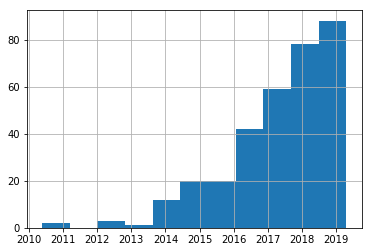

In [931]:
singleAAA["release_date"] = singleAAA["release_date"].astype("datetime64")
hist1 = singleAAA["release_date"].hist(bins=11)

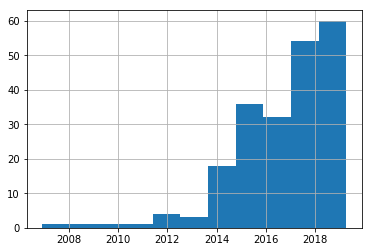

In [932]:
multiAAA["release_date"] = multiAAA["release_date"].astype("datetime64")
hist2 = multiAAA["release_date"].hist(bins=11)

Ara mostrarem el nombre de propietaris total i mitjà per any i tipus de joc. Les gràfiques mostren un comportament més erràtic pels jocs amb multijugador. 

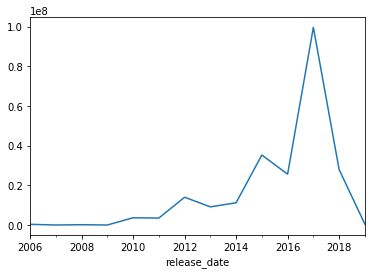

In [933]:
multiAAA_yearly_sum = multiAAA.resample('Y', on='release_date').sum()
multiAAA_yearly_sum["corrected_owners"].plot()

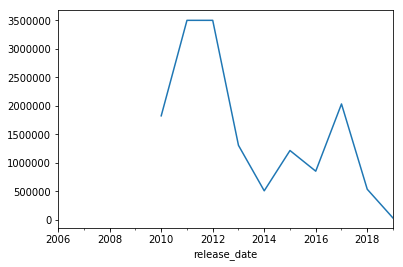

In [934]:
multiAAA_yearly_mean = multiAAA.resample('Y', on='release_date').mean()
multiAAA_yearly_mean["corrected_owners"].plot()

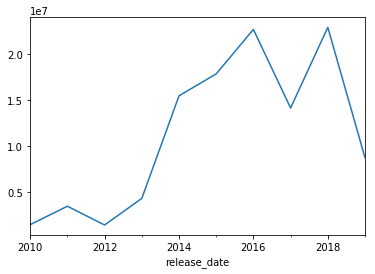

In [935]:
singleAAA_yearly_sum = singleAAA.resample('Y', on='release_date').sum()
singleAAA_yearly_sum["corrected_owners"].plot()

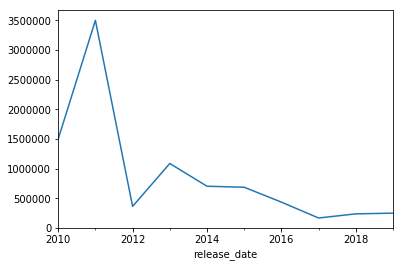

In [936]:
singleAAA_yearly_mean = singleAAA.resample('Y', on='release_date').mean()
singleAAA_yearly_mean["corrected_owners"].plot()

Sobre el preu podem veure com s'ha mantingut estable pels jocs d'un jugador, amb un pic molt clar a l'any 2012 i que en canvi pels jocs multijugador si s'ha vist un increment encara que l'any 2012 també va tenir uns llançaments atípicament cars.

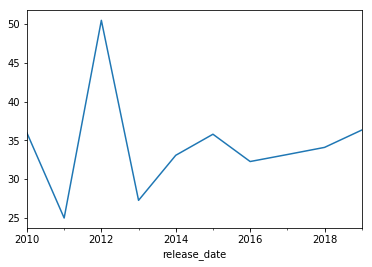

In [937]:
singleAAA_yearly_mean["price"].plot()

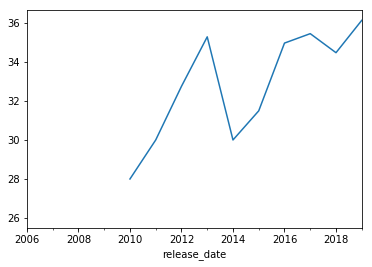

In [938]:
multiAAA_yearly_mean["price"].plot()

## 6. Resolució del problema. A partir dels resultats obtinguts, quines són les conclusions? Els resultats permeten respondre al problema?

Les conclusions són que els jocs AA o AAA amb un preu major de 24 lliures esterlines a la plataforma de venta de jocs online Steam tenen més propietaris si inclouen una opció joc multijugador. No podem confirmar que la seva valoració entre el públic sigui diferent.



## 7. Codi: Cal adjuntar el codi, preferiblement en R, amb el que s’ha realitzat la neteja, anàlisi i representació de les dades. Si ho preferiu, també podeu treballar en Python.

El codi d'aquesta pràctica s'ha desenvolupat completament en Python 3 fent servir un únic jupyter-notebook. 